In [1]:
pip install pybaseball

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pybaseball import cache
cache.enable()
from pybaseball import statcast
from sklearn import preprocessing

In [3]:
data = pd.read_csv('initial_data.csv')
data.fillna(0)

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,3499,FF,2021-06-25,94.7,-1.81,5.49,"Neris, Hector",642086,593576,strikeout,...,2,2,1,1,2,Infield shift,Standard,226.0,-0.160,-0.249
1,3613,FF,2021-06-25,94.7,-1.77,5.55,"Neris, Hector",642086,593576,0,...,2,2,1,1,2,Infield shift,Standard,228.0,0.000,-0.068
2,3707,FS,2021-06-25,84.0,-1.58,5.95,"Neris, Hector",642086,593576,0,...,2,2,1,1,2,Infield shift,Standard,252.0,0.000,-0.039
3,3908,FS,2021-06-25,85.7,-1.56,5.83,"Neris, Hector",624413,593576,field_out,...,2,2,1,1,2,Standard,Standard,254.0,-0.118,-0.188
4,3979,SI,2021-06-25,94.2,-1.97,5.74,"Neris, Hector",624413,593576,0,...,2,2,1,1,2,Standard,Standard,214.0,0.000,-0.079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651619,366,FF,2020-07-23,96.1,-3.28,5.13,"Scherzer, Max",543305,453286,field_out,...,0,0,0,0,0,Infield shift,Standard,227.0,0.022,-0.216
651620,383,CU,2020-07-23,79.7,-3.36,5.48,"Scherzer, Max",543305,453286,0,...,0,0,0,0,0,Infield shift,Standard,60.0,0.000,-0.076
651621,392,FF,2020-07-23,96.7,-3.21,5.33,"Scherzer, Max",543305,453286,0,...,0,0,0,0,0,Infield shift,Standard,224.0,0.000,-0.060
651622,416,FF,2020-07-23,96.1,-3.38,5.33,"Scherzer, Max",543305,453286,0,...,0,0,0,0,0,Infield shift,Standard,226.0,0.000,0.060


In [4]:
data['events']

0         strikeout
1               NaN
2               NaN
3         field_out
4               NaN
            ...    
651619    field_out
651620          NaN
651621          NaN
651622          NaN
651623          NaN
Name: events, Length: 651624, dtype: object

In [5]:
description_dic = {'hit_into_play': -1, 'swinging_strike_blocked': 3, 'ball': -2,
           'foul': 0, 'called_strike': 2, 'swinging_strike': 3, 'blocked_ball': -2,
          'foul_tip': 0, 'foul_bunt': 0, 'hit_by_pitch': -3, 'missed_bunt': 3,
          'pitchout': 3, 'bunt_foul_tip': 0, 'foul_pitchout': 0}

data['description'] = data['description'].replace(description_dic)

In [6]:
unique_values = data['pitch_type'].unique()
pitch_dic = {value: index for index, value in enumerate(unique_values)}
data['pitch_type'] = data['pitch_type'].replace(pitch_dic)

In [7]:
score = data[['events', 'description']]

In [8]:
data['events'].unique()

array(['strikeout', nan, 'field_out', 'sac_fly', 'walk', 'single',
       'grounded_into_double_play', 'home_run', 'force_out', 'sac_bunt',
       'hit_by_pitch', 'double', 'field_error', 'double_play', 'triple',
       'fielders_choice_out', 'fielders_choice', 'caught_stealing_2b',
       'strikeout_double_play', 'wild_pitch', 'pickoff_2b', 'other_out',
       'triple_play', 'catcher_interf', 'pickoff_1b', 'pickoff_3b',
       'game_advisory', 'caught_stealing_home', 'sac_fly_double_play',
       'caught_stealing_3b', 'pickoff_caught_stealing_2b',
       'sac_bunt_double_play', 'pickoff_caught_stealing_3b',
       'stolen_base_2b', 'passed_ball'], dtype=object)

In [9]:
score.fillna(0)
score[score['events'] == 'home_run']

,events,description
66,home_run,-1
328,home_run,-1
382,home_run,-1
504,home_run,-1
523,home_run,-1
...,...,...
650730,home_run,-1
650760,home_run,-1
651203,home_run,-1
651590,home_run,-1


In [10]:
score.loc[score['events'] == 'home_run', 'description'] = -3
score[score['events']=='home_run']

,events,description
66,home_run,-3
328,home_run,-3
382,home_run,-3
504,home_run,-3
523,home_run,-3
...,...,...
650730,home_run,-3
650760,home_run,-3
651203,home_run,-3
651590,home_run,-3


In [11]:
pitch_dic

{'FF': 0,
 'FS': 1,
 'SI': 2,
 'KC': 3,
 'CH': 4,
 'FC': 5,
 'SL': 6,
 'ST': 7,
 'CU': 8,
 'PO': 9,
 'CS': 10,
 'FA': 11,
 'SV': 12,
 'KN': 13,
 nan: 14,
 'EP': 15,
 'SC': 16}

In [12]:
pitch_data = data[['pitch_type', 'release_speed', 'release_pos_x', 'release_pos_z',
                 'zone', 'plate_x', 'plate_z', 'vx0',
                 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot', 'effective_speed',
                 'release_spin_rate', 'release_extension', 'release_pos_y', 'spin_axis']]

In [13]:
np.unique(pitch_data.isna(), return_counts = True)

(array([False,  True]), array([12667392,   365088]))

In [14]:
pitch_data['description'] = score['description'] 
new_df = pitch_data.dropna()

/tmp/ipykernel_1296/188330530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pitch_data['description'] = score['description']


In [15]:
new_df

,pitch_type,release_speed,release_pos_x,release_pos_z,zone,plate_x,plate_z,vx0,vy0,vz0,...,ay,az,sz_top,sz_bot,effective_speed,release_spin_rate,release_extension,release_pos_y,spin_axis,description
0,0,94.7,-1.81,5.49,12.0,0.12,4.16,6.768865,-137.755566,-0.693072,...,30.449915,-15.630556,3.37,1.53,94.6,2228.0,6.3,54.25,226.0,3
1,0,94.7,-1.77,5.55,11.0,-0.16,3.55,5.838900,-137.772022,-2.455717,...,31.299973,-15.159448,3.37,1.53,94.6,2225.0,6.3,54.19,228.0,3
2,1,84.0,-1.58,5.95,1.0,-0.55,3.23,3.701940,-122.258047,-0.029899,...,24.007013,-31.811509,3.36,1.66,83.5,970.0,5.9,54.57,252.0,2
3,1,85.7,-1.56,5.83,14.0,0.84,1.33,7.050352,-124.700065,-3.984507,...,24.500376,-33.606470,3.49,1.60,86.0,975.0,6.5,54.04,254.0,-1
4,2,94.2,-1.97,5.74,11.0,-1.22,3.00,4.856891,-137.187852,-3.520000,...,29.822087,-19.819791,3.49,1.60,94.5,2134.0,6.4,54.11,214.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651619,0,96.1,-3.28,5.13,5.0,-0.19,2.41,9.899700,-139.626080,-4.473902,...,30.128689,-14.962333,3.41,1.56,96.3,2450.0,6.4,54.09,227.0,-1
651620,8,79.7,-3.36,5.48,7.0,-0.41,1.85,4.691537,-116.064292,0.319935,...,22.130450,-39.867212,3.51,1.65,79.6,2846.0,6.2,54.28,60.0,2
651621,0,96.7,-3.21,5.33,9.0,0.48,2.07,11.547336,-140.289508,-5.998194,...,30.880442,-14.099707,3.33,1.65,96.4,2421.0,6.2,54.29,224.0,2
651622,0,96.1,-3.38,5.33,11.0,-1.17,2.75,7.600636,-139.767747,-4.483222,...,30.151437,-12.476899,3.58,1.75,95.9,2477.0,6.1,54.38,226.0,-2


In [16]:
fast_balls  = new_df[new_df['pitch_type'] == 0]

In [17]:
fast_balls

,pitch_type,release_speed,release_pos_x,release_pos_z,zone,plate_x,plate_z,vx0,vy0,vz0,...,ay,az,sz_top,sz_bot,effective_speed,release_spin_rate,release_extension,release_pos_y,spin_axis,description
0,0,94.7,-1.81,5.49,12.0,0.12,4.16,6.768865,-137.755566,-0.693072,...,30.449915,-15.630556,3.37,1.53,94.6,2228.0,6.3,54.25,226.0,3
1,0,94.7,-1.77,5.55,11.0,-0.16,3.55,5.838900,-137.772022,-2.455717,...,31.299973,-15.159448,3.37,1.53,94.6,2225.0,6.3,54.19,228.0,3
7,0,95.9,-0.88,5.38,8.0,0.06,2.14,3.055113,-139.493718,-6.129241,...,32.118919,-13.252013,3.55,1.63,97.9,2178.0,7.5,53.00,197.0,-1
8,0,94.9,-1.28,5.29,2.0,-0.27,2.99,3.287852,-138.279052,-2.795230,...,29.216699,-18.280917,3.32,1.51,96.6,2071.0,7.1,53.43,205.0,-1
9,0,95.0,-1.25,5.34,2.0,0.23,3.17,5.082261,-138.300147,-2.518650,...,29.787355,-17.815534,3.47,1.59,96.3,1981.0,6.9,53.59,203.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651618,0,96.6,-3.17,5.56,13.0,-0.17,1.50,9.850325,-140.195840,-8.428933,...,28.639511,-12.016117,3.99,1.99,96.7,2575.0,6.3,54.25,223.0,-2
651619,0,96.1,-3.28,5.13,5.0,-0.19,2.41,9.899700,-139.626080,-4.473902,...,30.128689,-14.962333,3.41,1.56,96.3,2450.0,6.4,54.09,227.0,-1
651621,0,96.7,-3.21,5.33,9.0,0.48,2.07,11.547336,-140.289508,-5.998194,...,30.880442,-14.099707,3.33,1.65,96.4,2421.0,6.2,54.29,224.0,2
651622,0,96.1,-3.38,5.33,11.0,-1.17,2.75,7.600636,-139.767747,-4.483222,...,30.151437,-12.476899,3.58,1.75,95.9,2477.0,6.1,54.38,226.0,-2


In [18]:
fast_balls.columns

Index(['pitch_type', 'release_speed', 'release_pos_x', 'release_pos_z', 'zone',
       'plate_x', 'plate_z', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top',
       'sz_bot', 'effective_speed', 'release_spin_rate', 'release_extension',
       'release_pos_y', 'spin_axis', 'description'],
      dtype='object')

In [19]:
truth = fast_balls['description']
prac = fast_balls.drop(columns = ['description'])

In [20]:
truth.shape

(219177,)

In [21]:
np.unique(truth, return_counts = True)

(array([-3, -2, -1,  0,  2,  3]),
 array([ 2754, 76056, 32526, 47528, 39595, 20718]))

In [22]:
from sklearn.preprocessing import StandardScaler

# Assuming you have X_train and y_train as your training data
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(prac, truth,random_state= 42, test_size=0.2)





In [23]:
import xgboost as xgb
tree = xgb.XGBRegressor(booster = 'gbtree', use_label_encoder=False,
                         n_estimators=20, max_depth = 20, max_leaves = 10, 
                         max_delta_step = 10)
tree.fit(X_train, y_train.astype(int))


XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=10,
             max_depth=20, max_leaves=10, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=20, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None, ...)

In [24]:
prac.columns

Index(['pitch_type', 'release_speed', 'release_pos_x', 'release_pos_z', 'zone',
       'plate_x', 'plate_z', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top',
       'sz_bot', 'effective_speed', 'release_spin_rate', 'release_extension',
       'release_pos_y', 'spin_axis'],
      dtype='object')

In [25]:
preds = tree.predict(X_val)

In [26]:
X_val.shape

(43836, 20)

In [27]:
np.unique(y_val, return_counts = True)

(array([-3, -2, -1,  0,  2,  3]),
 array([  565, 15286,  6435,  9582,  7805,  4163]))

In [28]:
score = tree.score(X_val, y_val)
score

0.3349798946143602

Text(0, 0.5, 'Score')

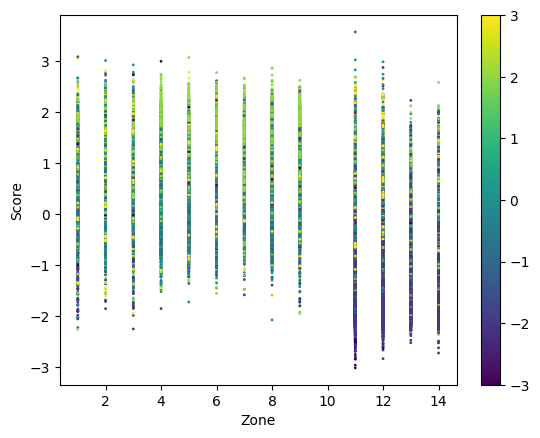

In [29]:
plt.scatter(X_val['zone'], preds, c = y_val, s = 1)
plt.colorbar()
plt.xlabel('Zone')
plt.ylabel('Score')


In [30]:
imp = (tree.feature_importances_)
names = np.array(X_train.columns)
feats = (np.column_stack((names, imp.T)))
imps = np.argsort(feats[:,1])[::-1]
imp_sorted = feats[imps]
imp_sorted

array([['zone', 0.5136372447013855],
       ['sz_bot', 0.05445175990462303],
       ['sz_top', 0.051182616502046585],
       ['plate_z', 0.04520890861749649],
       ['plate_x', 0.034210845828056335],
       ['release_pos_y', 0.028011757880449295],
       ['az', 0.026904262602329254],
       ['vy0', 0.026774398982524872],
       ['effective_speed', 0.02548437938094139],
       ['spin_axis', 0.024015186354517937],
       ['release_spin_rate', 0.023581787943840027],
       ['vz0', 0.02355281449854374],
       ['vx0', 0.023044029250741005],
       ['ax', 0.02235986292362213],
       ['ay', 0.021913712844252586],
       ['release_extension', 0.01981876604259014],
       ['release_pos_z', 0.01581789180636406],
       ['release_pos_x', 0.013176108710467815],
       ['release_speed', 0.006853632628917694],
       ['pitch_type', 0.0]], dtype=object)

In [31]:
new_df['pitch_type']

0         0
1         0
2         1
3         1
4         2
         ..
651619    0
651620    8
651621    0
651622    0
651623    0
Name: pitch_type, Length: 629242, dtype: int64

In [32]:
pip install bayes_opt

ERROR: Could not find a version that satisfies the requirement bayes_opt (from versions: none)
ERROR: No matching distribution found for bayes_opt
Note: you may need to restart the kernel to use updated packages.


In [33]:
'''#from xgboost import XGBRegressor
from bayes_opt import BayesianOptimization

# Define the objective function to optimize
def objective_function(max_leaves, max_depth, n_estimators):
    # Convert the parameters to integer values
    max_leaves = int(max_leaves)
    max_depth = int(max_depth)
    n_estimators = int(n_estimators)

    # Create the XGBoost regressor with the given parameters
    model = xgb.XGBRegressor(booster = 'gbtree', use_label_encoder=False,
                         n_estimators=n_estimators, max_depth = max_depth, max_leaves = max_leaves, 
                         max_delta_step = 10)

    # Train and evaluate the model using cross-validation
    # Replace with your own data and evaluation metric
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

    # Return the negative mean squared error as the objective to minimize
    # Replace with your own objective or metric
    return -np.mean(scores)

# Define the parameter space to explore
pbounds = {'max_leaves': (10, 30), 'max_depth': (10, 50), 'n_estimators': (5,15)}

# Perform Bayesian optimization
optimizer = BayesianOptimization(f=objective_function, pbounds=pbounds)
optimizer.maximize(init_points=3, n_iter=3)

# Retrieve the best parameters found
best_params = optimizer.max['params']
print("Best Parameters:", best_params)'''


'#from xgboost import XGBRegressor\nfrom bayes_opt import BayesianOptimization\n\n# Define the objective function to optimize\ndef objective_function(max_leaves, max_depth, n_estimators):\n    # Convert the parameters to integer values\n    max_leaves = int(max_leaves)\n    max_depth = int(max_depth)\n    n_estimators = int(n_estimators)\n\n    # Create the XGBoost regressor with the given parameters\n    model = xgb.XGBRegressor(booster = \'gbtree\', use_label_encoder=False,\n                         n_estimators=n_estimators, max_depth = max_depth, max_leaves = max_leaves, \n                         max_delta_step = 10)\n\n    # Train and evaluate the model using cross-validation\n    # Replace with your own data and evaluation metric\n    scores = cross_val_score(model, X_train, y_train, cv=5, scoring=\'neg_mean_squared_error\')\n\n    # Return the negative mean squared error as the objective to minimize\n    # Replace with your own objective or metric\n    return -np.mean(scores)\n

In [40]:
#for fastballs change to prac and truth...
X_train, X_val, y_train, y_val = train_test_split(prac, 
                                                  truth,
                                                  random_state= 42,
                                                  test_size=0.2)

In [41]:
tree = xgb.XGBRegressor(booster = 'gbtree', use_label_encoder=False,
                         n_estimators=15, max_depth = 50, max_leaves = 10, 
                         max_delta_step = 10)
tree.fit(X_train, y_train.astype(int))

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=10,
             max_depth=50, max_leaves=10, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=15, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None, ...)

Text(0, 0.5, 'Score')

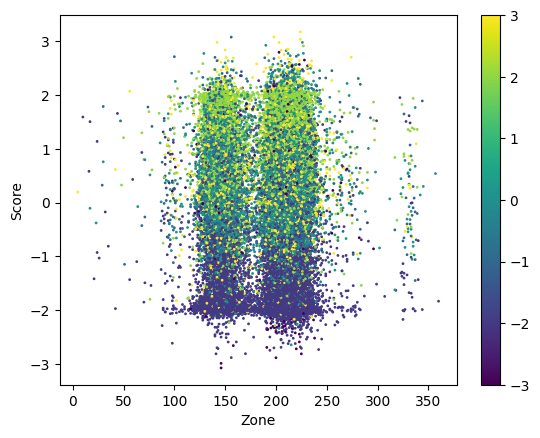

In [44]:
preds = tree.predict(X_val)
plt.scatter(X_val['spin_axis'], preds, c = y_val, s = 1)
plt.colorbar()
plt.xlabel('Zone')
plt.ylabel('Score')
